![example](images/director_shot.jpeg)

# A Vision for Microsoft Tenné 

**Authors:** Rebecca Frost-Brewer
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
rt_movieinfo = pd.read_csv("data/zippedData/rt.movie_info.tsv.gz", sep = "\t")
# as a tsv file, we need to specify where to separate the data

rt_reviews = pd.read_csv("data/zippedData/rt.reviews.tsv.gz", sep = "\t", encoding = "latin1")
# since there is a lot of text in this file, we need to specify how its encoded

tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

imdb_title_basics = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

rt_movieinfo

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [ ]:
print(rt_movieinfo.head())
print(rt_reviews.head())
print(imdb_title_basics.head())
print(imdb_title_ratings.head())

Since the Rotten Tomatoes and the IMDB files have the same index numbers, respectively, I want to join the RT files and the IMDB files so I just have two files I am working with rather than five.

In [74]:
rtreviews = rt_movieinfo.join(rt_reviews.set_index('id'), how = 'inner', on = 'id', rsuffix = 'r')

rtreviews.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,ratingr,fresh,critic,top_critic,publisher,date
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [249]:
imdbreviews = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

imdbreviews = imdbreviews.drop(columns = ['original_title'])
# Based on the documentation from IMDb, the primary title is the more popular title,
# used by the filmmakers on promotional materials whereas the original title is the original title,
# in its original language. I decided to drop the original title since we'll be more familiar with
# the primary title
imdbreviews.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


A note on the average rating and number of votes. According to the IMDb documentation, the averageRating is the weighted average of all the individual user ratings and the numVotes is the number of votes the title has received. Unfortunately, it doesn't seem that we can ascertain the number of user ratings per film and I'm not sure how the weighted average rating was calculated.

In [101]:
# We want to split the genre column for analysis, so that each genre is on its own

imdbreviews = imdbreviews.assign(genres = imdbreviews['genres'].str.split(',')).explode('genres')
imdbreviews.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Drama,7.2,43


In [102]:
imdbreviews['genres'].unique()

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'History',
       'Documentary', 'Mystery', nan, 'Sci-Fi', 'Family', 'Romance',
       'War', 'Music', 'Sport', 'Western', 'Musical', 'News',
       'Reality-TV', 'Game-Show', 'Adult', 'Short'], dtype=object)

In [103]:
len(imdbreviews['genres'].unique())

27

In [116]:
topratings = imdbreviews[(imdbreviews['averagerating'] >= 8) & (imdbreviews['numvotes'] > 50000)
                        & (imdbreviews['start_year'] >= 2012)]
topratings

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
266,tt0790636,Dallas Buyers Club,2013,117.0,Biography,8.0,402462
266,tt0790636,Dallas Buyers Club,2013,117.0,Drama,8.0,402462
311,tt0816692,Interstellar,2014,169.0,Adventure,8.6,1299334
311,tt0816692,Interstellar,2014,169.0,Drama,8.6,1299334
311,tt0816692,Interstellar,2014,169.0,Sci-Fi,8.6,1299334
...,...,...,...,...,...,...,...
105144,tt6146586,John Wick: Chapter 3 - Parabellum,2019,131.0,Crime,8.0,81568
105144,tt6146586,John Wick: Chapter 3 - Parabellum,2019,131.0,Thriller,8.0,81568
117014,tt6966692,Green Book,2018,130.0,Biography,8.3,204972
117014,tt6966692,Green Book,2018,130.0,Comedy,8.3,204972


In [124]:
topratings_genre = (pd.DataFrame(topratings.groupby('genres').primary_title.nunique())).sort_values(
    'primary_title', ascending = False)

topratings_genre

,primary_title
genres,
Drama,41
Action,21
Adventure,16
Comedy,15
Biography,13
Crime,10
Thriller,10
Sci-Fi,10
Mystery,6


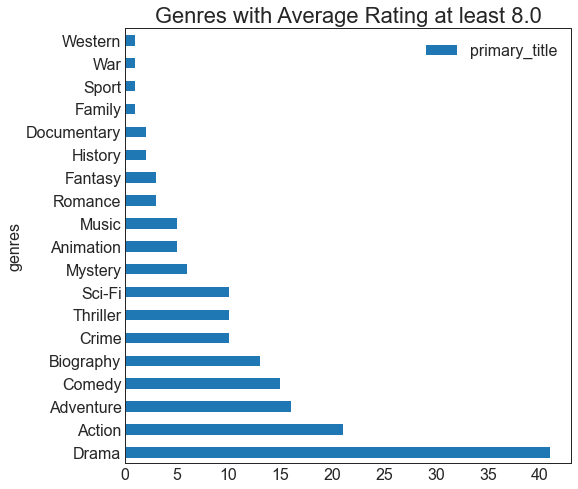

In [120]:
topratings_genre[['primary_title']].plot.barh(
    stacked = True, title = 'Genres with Average Rating at least 8.0', figsize=(8, 8));

In [130]:
genre_ratings = topratings.groupby('genres').averagerating.agg(['count','mean']).sort_values(
    'mean', ascending = False)
genre_ratings[genre_ratings['count'] >= 5]

,count,mean
genres,,
Animation,5,8.300000
Action,21,8.242857
Sci-Fi,10,8.220000
Adventure,16,8.212500
Drama,41,8.180488
Music,5,8.140000
Biography,13,8.138462
Crime,10,8.130000
Comedy,15,8.126667


In [157]:
movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors = 'coerce')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [160]:
topratings_gross = topratings.join(movie_gross.set_index('title'),
                                  how = 'inner', on = 'primary_title', rsuffix = 'r')
topratings_gross

In [164]:
topratings_gross['total_gross'] = topratings_gross['domestic_gross'] + topratings_gross['foreign_gross']
topratings_gross

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
266,tt0790636,Dallas Buyers Club,2013,117.0,Biography,8.0,402462,Focus,27300000.0,27900000.0,2013,55200000.0
266,tt0790636,Dallas Buyers Club,2013,117.0,Drama,8.0,402462,Focus,27300000.0,27900000.0,2013,55200000.0
311,tt0816692,Interstellar,2014,169.0,Adventure,8.6,1299334,Par.,188000000.0,489400000.0,2014,677400000.0
311,tt0816692,Interstellar,2014,169.0,Drama,8.6,1299334,Par.,188000000.0,489400000.0,2014,677400000.0
311,tt0816692,Interstellar,2014,169.0,Sci-Fi,8.6,1299334,Par.,188000000.0,489400000.0,2014,677400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91844,tt5311514,Your Name.,2016,106.0,Drama,8.4,134084,FUN,5000000.0,353000000.0,2017,358000000.0
91844,tt5311514,Your Name.,2016,106.0,Fantasy,8.4,134084,FUN,5000000.0,353000000.0,2017,358000000.0
117014,tt6966692,Green Book,2018,130.0,Biography,8.3,204972,Uni.,85100000.0,234700000.0,2018,319800000.0
117014,tt6966692,Green Book,2018,130.0,Comedy,8.3,204972,Uni.,85100000.0,234700000.0,2018,319800000.0


In [197]:
mostprofitable = topratings_gross[['primary_title', 'total_gross', 'genres', 'averagerating']]
mostprofitable

,primary_title,total_gross,genres,averagerating
266,Dallas Buyers Club,55200000.0,Biography,8.0
266,Dallas Buyers Club,55200000.0,Drama,8.0
311,Interstellar,677400000.0,Adventure,8.6
311,Interstellar,677400000.0,Drama,8.6
311,Interstellar,677400000.0,Sci-Fi,8.6
...,...,...,...,...
91844,Your Name.,358000000.0,Drama,8.4
91844,Your Name.,358000000.0,Fantasy,8.4
117014,Green Book,319800000.0,Biography,8.3
117014,Green Book,319800000.0,Comedy,8.3


In [198]:
genres_mostprofitable = mostprofitable.groupby(['genres']).mean()
genres_mostprofitable

,total_gross,averagerating
genres,,
Action,6.072000e+08,8.166667
Adventure,6.714909e+08,8.166667
Animation,7.616250e+08,8.250000
Biography,3.243300e+08,8.141667
Comedy,5.226300e+08,8.108333
Crime,1.892800e+08,8.116667
Documentary,NaN,8.200000
Drama,2.682346e+08,8.154545
Family,3.059000e+08,8.000000


In [201]:
genres_mostprofitable = genres_mostprofitable.dropna()
genres_mostprofitable

,averagerating,gross_million
genres,,
Animation,8.250000,761.625000
Adventure,8.166667,671.490909
Action,8.166667,607.200000
Sci-Fi,8.200000,538.600000
Comedy,8.108333,522.630000
Western,8.400000,425.400000
Fantasy,8.400000,358.000000
Music,8.140000,353.075000
Thriller,8.128571,350.040000


In [200]:
genres_mostprofitable['gross_million'] = genres_mostprofitable['total_gross']/1000000
del genres_mostprofitable['total_gross']
genres_mostprofitable.sort_values('gross_million', ascending = False, inplace = True)

<ipython-input-200-ae52b99e990d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_mostprofitable['gross_million'] = genres_mostprofitable['total_gross']/1000000
<ipython-input-200-ae52b99e990d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_mostprofitable.sort_values('gross_million', ascending = False, inplace = True)


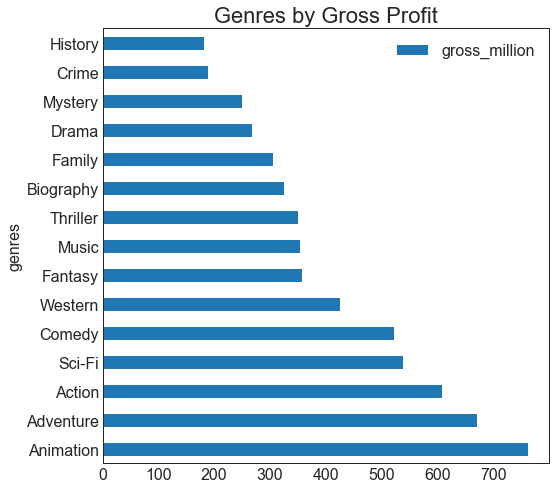

In [196]:
genres_mostprofitable[['gross_million']].plot.barh(stacked=True, title = 'Genres by Gross Profit', figsize=(8, 8));

In [212]:
titles_mostprofitable = mostprofitable.groupby(['primary_title']).mean()
titles_mostprofitable = titles_mostprofitable.dropna()
titles_mostprofitable['gross_million'] = titles_mostprofitable['total_gross']/1000000
del titles_mostprofitable['total_gross']
titles_mostprofitable.sort_values('gross_million', ascending = False, inplace = True)
titles_mostprofitable

,averagerating,gross_million
primary_title,,
The Dark Knight Rises,8.4,1084.9
Zootopia,8.0,1023.8
Bohemian Rhapsody,8.0,903.6
Inside Out,8.2,857.6
Coco,8.4,807.1
Deadpool,8.0,783.1
Guardians of the Galaxy,8.1,773.4
X-Men: Days of Future Past,8.0,747.8
Interstellar,8.6,677.4


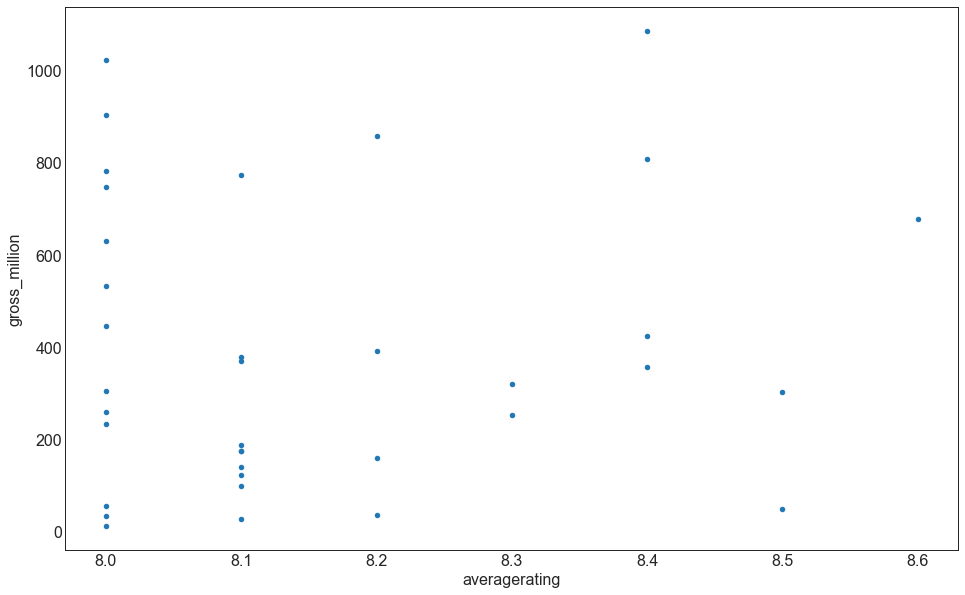

In [213]:
titles_mostprofitable.plot(kind = 'scatter', x = 'averagerating', y = 'gross_million');

In [214]:
titles_mostprofitable.corr()

,averagerating,gross_million
averagerating,1.000000,0.083709
gross_million,0.083709,1.000000


In [233]:
imdbreviews

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,2019,114.0,Drama,7.2,43
...,...,...,...,...,...,...,...
146122,tt9914286,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
146122,tt9914286,Sokagin Çocuklari,2019,98.0,Family,8.7,136
146125,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
146129,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [234]:
imdbreviews_popular = imdbreviews[imdbreviews['numvotes'] >= 50000]

In [235]:
imdbreviews_popular.sort_values(by = 'averagerating', ascending = False)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
99483,tt5813916,The Mountain II,2016,135.0,War,9.3,100568
99483,tt5813916,The Mountain II,2016,135.0,Drama,9.3,100568
99483,tt5813916,The Mountain II,2016,135.0,Action,9.3,100568
7066,tt1375666,Inception,2010,148.0,Sci-Fi,8.8,1841066
72821,tt4154796,Avengers: Endgame,2019,181.0,Action,8.8,441135
...,...,...,...,...,...,...,...
43182,tt2574698,Gunday,2014,152.0,Romance,2.2,56405
102324,tt5988370,Reis,2017,108.0,Drama,1.8,71887
102324,tt5988370,Reis,2017,108.0,Biography,1.8,71887
13966,tt1702443,Justin Bieber: Never Say Never,2011,105.0,Documentary,1.6,74978


In [236]:
imdbreviews_popular

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Adventure,7.3,275300
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Comedy,7.3,275300
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Drama,7.3,275300
58,tt0365907,A Walk Among the Tombstones,2014,114.0,Action,6.5,105116
58,tt0365907,A Walk Among the Tombstones,2014,114.0,Crime,6.5,105116
...,...,...,...,...,...,...,...
129149,tt7959026,The Mule,2018,116.0,Drama,7.1,58955
129149,tt7959026,The Mule,2018,116.0,Thriller,7.1,58955
143242,tt9495224,Black Mirror: Bandersnatch,2018,90.0,Drama,7.3,91349
143242,tt9495224,Black Mirror: Bandersnatch,2018,90.0,Mystery,7.3,91349


In [239]:
imdbreviews_popular = imdbreviews_popular.join(movie_gross.set_index('title'), on = 'primary_title')

In [240]:
imdbreviews_popular

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Adventure,7.3,275300,Fox,58200000.0,129900000.0,2013.0
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Comedy,7.3,275300,Fox,58200000.0,129900000.0,2013.0
54,tt0359950,The Secret Life of Walter Mitty,2013,114.0,Drama,7.3,275300,Fox,58200000.0,129900000.0,2013.0
58,tt0365907,A Walk Among the Tombstones,2014,114.0,Action,6.5,105116,Uni.,26300000.0,26900000.0,2014.0
58,tt0365907,A Walk Among the Tombstones,2014,114.0,Crime,6.5,105116,Uni.,26300000.0,26900000.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...
129149,tt7959026,The Mule,2018,116.0,Drama,7.1,58955,WB,103800000.0,68700000.0,2018.0
129149,tt7959026,The Mule,2018,116.0,Thriller,7.1,58955,WB,103800000.0,68700000.0,2018.0
143242,tt9495224,Black Mirror: Bandersnatch,2018,90.0,Drama,7.3,91349,NaN,NaN,NaN,NaN
143242,tt9495224,Black Mirror: Bandersnatch,2018,90.0,Mystery,7.3,91349,NaN,NaN,NaN,NaN


In [243]:
imdbreviews_popular['total_gross'] = imdbreviews_popular['domestic_gross'] + imdbreviews_popular['foreign_gross']
imdbreviews_popular = imdbreviews_popular.dropna()
imdbreviews_popular['gross_million'] = imdbreviews_popular['total_gross']/1000000
del imdbreviews_popular['total_gross']

<ipython-input-243-b956b5e1de00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdbreviews_popular['gross_million'] = imdbreviews_popular['total_gross']/1000000


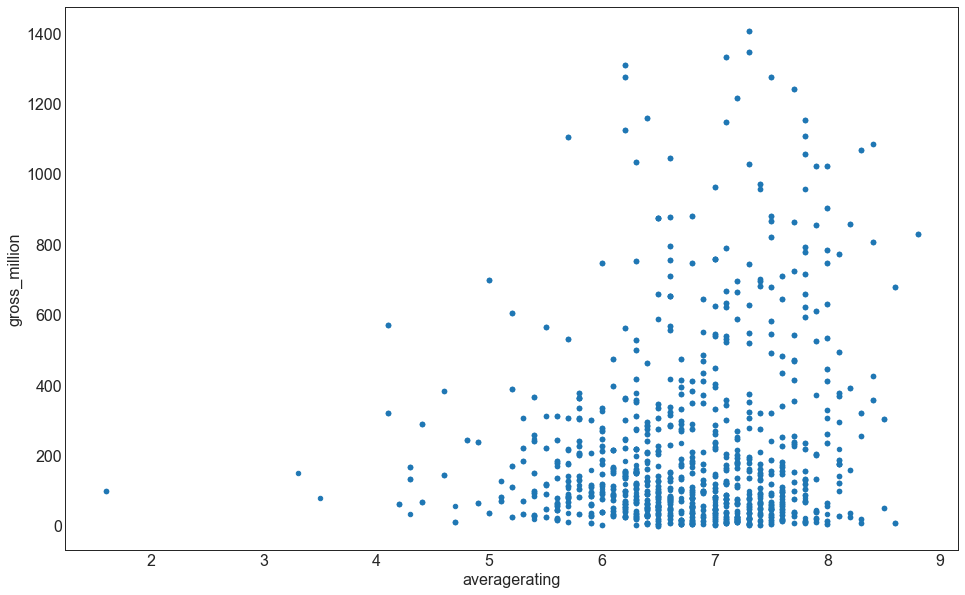

In [244]:
imdbreviews_popular.plot(kind = 'scatter', x = 'averagerating', y = 'gross_million');

In [247]:
imdbreviews_popular.corr()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,gross_million
start_year,1.000000,0.204736,0.124031,-0.045328,0.178487,0.195033,0.987867,0.196408
runtime_minutes,0.204736,1.000000,0.344319,0.408219,0.263748,0.280007,0.195619,0.284729
averagerating,0.124031,0.344319,1.000000,0.480134,0.208657,0.157089,0.132234,0.181982
numvotes,-0.045328,0.408219,0.480134,1.000000,0.577661,0.516712,-0.060012,0.558761
domestic_gross,0.178487,0.263748,0.208657,0.577661,1.000000,0.842088,0.167340,0.932088
foreign_gross,0.195033,0.280007,0.157089,0.516712,0.842088,1.000000,0.191483,0.980266
year,0.987867,0.195619,0.132234,-0.060012,0.167340,0.191483,1.000000,0.189938
gross_million,0.196408,0.284729,0.181982,0.558761,0.932088,0.980266,0.189938,1.000000


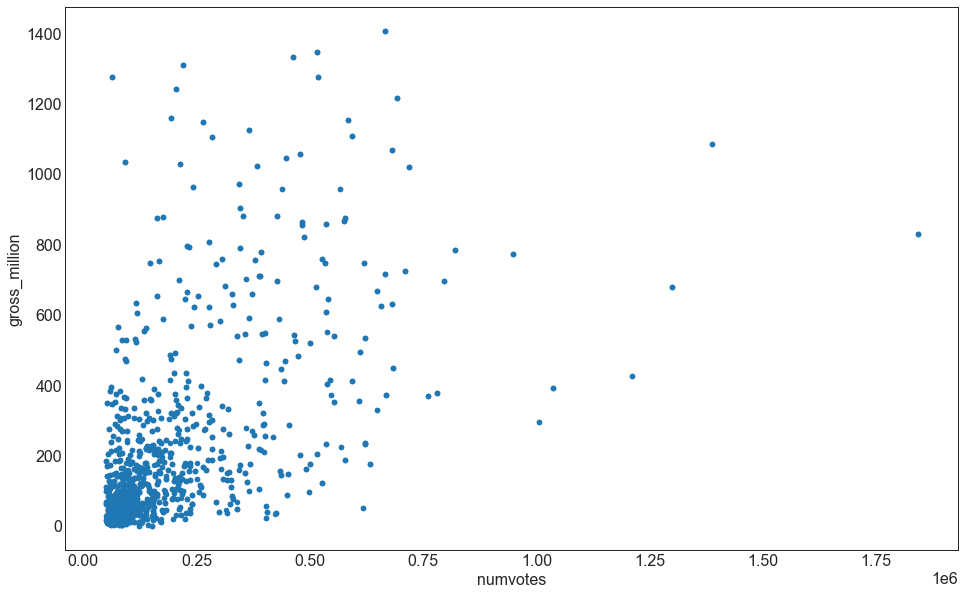

In [248]:
imdbreviews_popular.plot(kind = 'scatter', x = 'numvotes', y = 'gross_million');

In [85]:
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [280]:
tmdb_small = tmdb_movies[['title', 'vote_average']]
tmdb_small

,title,vote_average
0,Harry Potter and the Deathly Hallows: Part 1,7.7
1,How to Train Your Dragon,7.7
2,Iron Man 2,6.8
3,Toy Story,7.9
4,Inception,8.3
...,...,...
26512,Laboratory Conditions,0.0
26513,_EXHIBIT_84xxx_,0.0
26514,The Last One,0.0
26515,Trailer Made,0.0


In [281]:
imdbratings = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

imdbratings = imdbratings.drop(columns = ['original_title'])
imdbratings

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
146122,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
146125,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
146129,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [314]:
imdbratings = imdbratings.join(tmdb_small.set_index('title'), on = 'primary_title')
imdbratings

ValueError: columns overlap but no suffix specified: Index(['vote_average'], dtype='object')

In [313]:
imdbratings_small = imdbratings[['primary_title', 'start_year', 'genres', 'averagerating',
                                 'vote_average']]
imdbratings_small

,primary_title,start_year,genres,averagerating,vote_average
0,Sunghursh,2013,"Action,Crime,Drama",7.0,NaN
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,NaN
2,The Other Side of the Wind,2018,Drama,6.9,7.0
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,NaN
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,NaN
...,...,...,...,...,...
146122,Sokagin Çocuklari,2019,"Drama,Family",8.7,NaN
146125,Albatross,2017,Documentary,8.5,6.2
146125,Albatross,2017,Documentary,8.5,10.0
146129,La vida sense la Sara Amat,2019,NaN,6.6,NaN


In [312]:
imdbratings_small = imdbratings_small[(imdbratings_small['averagerating'] >= 8) &
                                      (imdbratings_small['vote_average'] >= 8) &
                                      (imdbratings_small['start_year'] >= 2002)]
imdbratings_small

,primary_title,start_year,genres,averagerating,vote_average,studio,domestic_gross,foreign_gross,year,domestic_grossr,foreign_grossr,domestic_grossr,foreign_grossr,domestic_gross_r,foreign_gross_r,domestic_gross_r,foreign_gross_r
244,Samsara,2011,Documentary,8.5,8.2,Osci.,2700000.0,NaN,2012.0,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN
244,Samsara,2011,Music,8.5,8.2,Osci.,2700000.0,NaN,2012.0,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN
311,Interstellar,2014,Adventure,8.6,8.2,Par.,188000000.0,489400000.0,2014.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0
311,Interstellar,2014,Drama,8.6,8.2,Par.,188000000.0,489400000.0,2014.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0
311,Interstellar,2014,Sci-Fi,8.6,8.2,Par.,188000000.0,489400000.0,2014.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142828,Apollo's Daring Mission,2018,Documentary,8.4,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142921,Bleed Out,2018,Documentary,8.6,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143569,Reel Rock 13,2018,Documentary,8.2,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143569,Reel Rock 13,2018,Sport,8.2,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
movie_gross_small = movie_gross[['title', 'domestic_gross', 'foreign_gross']]
movie_gross_small

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0
...,...,...,...
3382,The Quake,6200.0,NaN
3383,Edward II (2018 re-release),4800.0,NaN
3384,El Pacto,2500.0,NaN
3385,The Swan,2400.0,NaN


In [311]:
imdbratings_small = imdbratings_small.join(movie_gross_small.set_index('title'), on = 'primary_title',
                                          rsuffix = '_r')
imdbratings_small

,primary_title,start_year,genres,averagerating,vote_average,studio,domestic_gross,foreign_gross,year,domestic_grossr,foreign_grossr,domestic_grossr,foreign_grossr,domestic_gross_r,foreign_gross_r,domestic_gross_r,foreign_gross_r
244,Samsara,2011,Documentary,8.5,8.2,Osci.,2700000.0,NaN,2012.0,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN
244,Samsara,2011,Music,8.5,8.2,Osci.,2700000.0,NaN,2012.0,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN,2700000.0,NaN
311,Interstellar,2014,Adventure,8.6,8.2,Par.,188000000.0,489400000.0,2014.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0
311,Interstellar,2014,Drama,8.6,8.2,Par.,188000000.0,489400000.0,2014.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0
311,Interstellar,2014,Sci-Fi,8.6,8.2,Par.,188000000.0,489400000.0,2014.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0,188000000.0,489400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142828,Apollo's Daring Mission,2018,Documentary,8.4,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142921,Bleed Out,2018,Documentary,8.6,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143569,Reel Rock 13,2018,Documentary,8.2,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143569,Reel Rock 13,2018,Sport,8.2,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imdbratings_small = imdbratings_small.assign(genres = imdbratings_small['genres'].str.split(',')).explode('genres')
imdbratings_small

In [266]:
imdbratings['averating'] = imdbratings[["averagerating", "vote_average"]].mean()
imdbratings['avenumvotes'] = imdbratings[["numvotes", "vote_count"]].mean()
imdbratings

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,vote_average,vote_count,popularity,vote_averager,vote_countr,popularityr,vote_averager,vote_countr,popularityr,averating,avenumvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,7.0,64.0,9.8,7.0,64.0,9.800,7.0,64.0,9.800,NaN,NaN
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146125,tt9914642,Albatross,2017,NaN,Documentary,8.5,8,10.0,1.0,0.6,6.2,48.0,5.624,10.0,1.0,0.600,NaN,NaN
146125,tt9914642,Albatross,2017,NaN,Documentary,8.5,8,10.0,1.0,0.6,10.0,1.0,0.600,6.2,48.0,5.624,NaN,NaN
146125,tt9914642,Albatross,2017,NaN,Documentary,8.5,8,10.0,1.0,0.6,10.0,1.0,0.600,10.0,1.0,0.600,NaN,NaN
146129,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
import code.data_preparation as dp

In [2]:
# Import the visualization package you created

import code.visualizations as viz

<Figure size 1280x800 with 0 Axes>

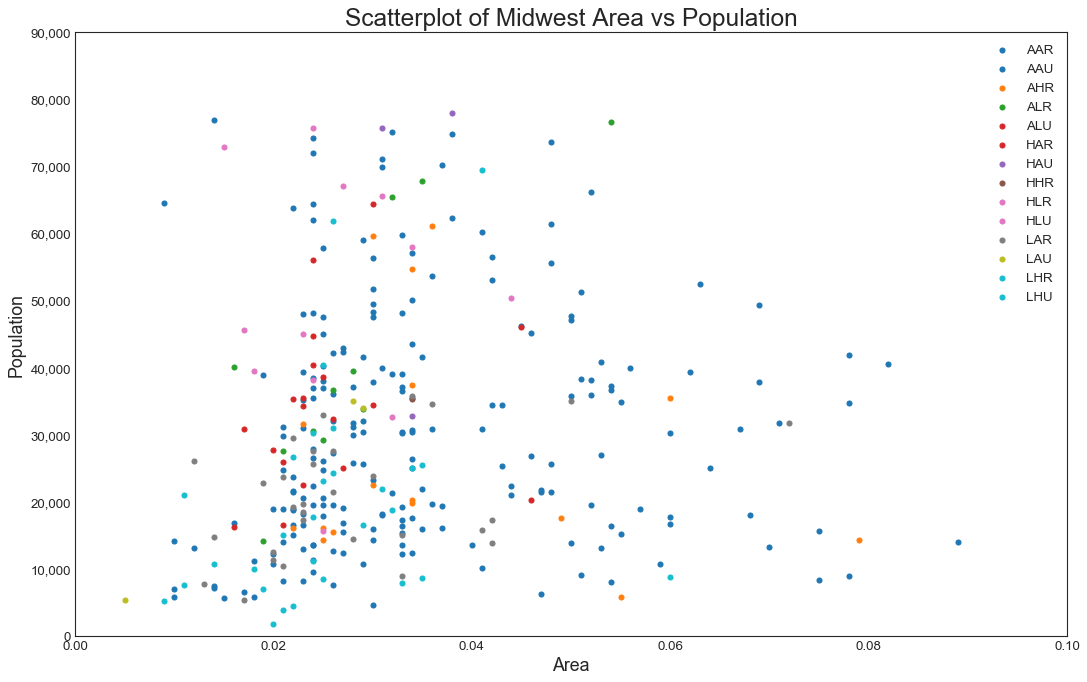

In [7]:
# This example function takes no arguments currently, but you would pass the full dataset to it for your project

viz.sample_plot_1()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [49]:
# here you run your code to clean the data
import code.data_cleaning as dc

full_dataset = dc.full_clean()

ModuleNotFoundError: No module named 'code.data_cleaning'

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***